### Unzipping the dataset.

In [ ]:
!unzip '/content/drive/MyDrive/mnistTask.zip'

Streaming output truncated to the last 5000 lines.
  inflating: mnistTask/5/image_022040.jpg  
  inflating: __MACOSX/mnistTask/5/._image_022040.jpg  
  inflating: mnistTask/5/image_004939.jpg  
  inflating: __MACOSX/mnistTask/5/._image_004939.jpg  
  inflating: mnistTask/5/image_003065.jpg  
  inflating: __MACOSX/mnistTask/5/._image_003065.jpg  
  inflating: mnistTask/5/image_045030.jpg  
  inflating: __MACOSX/mnistTask/5/._image_045030.jpg  
  inflating: mnistTask/5/image_042987.jpg  
  inflating: __MACOSX/mnistTask/5/._image_042987.jpg  
  inflating: mnistTask/5/image_040148.jpg  
  inflating: __MACOSX/mnistTask/5/._image_040148.jpg  
  inflating: mnistTask/5/image_048514.jpg  
  inflating: __MACOSX/mnistTask/5/._image_048514.jpg  
  inflating: mnistTask/5/image_007203.jpg  
  inflating: __MACOSX/mnistTask/5/._image_007203.jpg  
  inflating: mnistTask/5/image_018445.jpg  
  inflating: __MACOSX/mnistTask/5/._image_018445.jpg  
  inflating: mnistTask/5/image_022915.jpg  
  inflating: _

### Installing the reqd. pkg.

In [ ]:
pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=3b342904f26a91f162be7270dd0d9d4e39685bd9ce4d2d8dc669980174f14133
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


### Importing the packages

In [ ]:
import cv2
import os
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy

The dataset consists of 9 classes 0 to 9 both inclusive.

##### This block of code loads the training image into their corresponding vector and appends to X and their class labels which is the name of the folder itself to y. The images are converted to grayscale and then resized to (32,32) and each pixel is normalised by dividing it with 255.

In [ ]:
X = []
y = []
path = "/content/mnistTask/"
for i in range(0,10):
  folder = path + str(i)
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    data = Image.fromarray(img1)
    data = data.resize((32,32))
    data = image.img_to_array(data)
    X.append(data/255.0)
    y.append(i)

<ul><li>Converting our list to numpy array.</li></ul>

In [ ]:
X = np.array(X)
y = np.array(y)

<li>Printing the shapes of X and y.</li>

In [ ]:
print(X.shape, y.shape)

(60000, 32, 32, 1) (60000,)


<li>Converting y to categorical array.</li>

In [ ]:
from keras.utils import to_categorical
y= to_categorical(y,num_classes=10, dtype = 'int')

### Splitting the dataset into train and cross val set.

I splitted the train set into cross val set to keep a track of underfit,overfit and bestfit of the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=4)

### Training the pretrained model.

<li>Importing The packages.</li>

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.layers import Conv2D,MaxPooling2D, AveragePooling2D , BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import  ModelCheckpoint

<li>Loading the pretrained Model. </li>

In [ ]:
prev_model=load_model("/content/drive/MyDrive/Saved_Material_task2_part 1/Model.epoch09.hdf5")

<li>Popping the last layer as the dataset contains 10 classes.</li>

In [ ]:
prev_model.pop()

In [ ]:
prev_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_40 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_41 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 4, 4, 64)        

<li>Adding a softmax layer for 10 classes.</li>

In [ ]:
pretrain_model=Sequential()
pretrain_model.add(prev_model)
pretrain_model.add(Dense(10,activation='softmax'))

In [ ]:
pretrain_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
pretrain_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_19 (Sequential)   (None, 64)                70240     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 70,890
Trainable params: 70,634
Non-trainable params: 256
_________________________________________________________________


<li>Setting path to save model checkpoints.</li>

In [ ]:
model_path='Pretrained_Model.epoch{epoch:02d}.hdf5'
checkpoint= ModelCheckpoint(filepath='/content/drive/MyDrive/Saved_Material_task2_part 3/'+model_path,verbose=1)

<li>Training on the training dataset. I chose batch_size=256 because there were 48,000 images in training dataset. Hence to ensure every class was present in every batch.</li>

In [ ]:
history_pretrain=pretrain_model.fit(X_train,y_train,batch_size=256,validation_data=(X_cv,y_cv),epochs=10,callbacks=checkpoint)

Epoch 1/10
188/188 [==============================] - 58s 302ms/step - loss: 3.0840 - accuracy: 0.1064 - val_loss: 2.2996 - val_accuracy: 0.1072

Epoch 00001: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Pretrained_Model.epoch01.hdf5
Epoch 2/10
188/188 [==============================] - 57s 302ms/step - loss: 2.2665 - accuracy: 0.1215 - val_loss: 2.2728 - val_accuracy: 0.1109

Epoch 00002: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Pretrained_Model.epoch02.hdf5
Epoch 3/10
188/188 [==============================] - 56s 298ms/step - loss: 2.2456 - accuracy: 0.1262 - val_loss: 2.2715 - val_accuracy: 0.1114

Epoch 00003: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Pretrained_Model.epoch03.hdf5
Epoch 4/10
188/188 [==============================] - 56s 298ms/step - loss: 2.2335 - accuracy: 0.1312 - val_loss: 2.2678 - val_accuracy: 0.1099

Epoch 00004: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Pretra

<li>Plot for accuracy.</li>

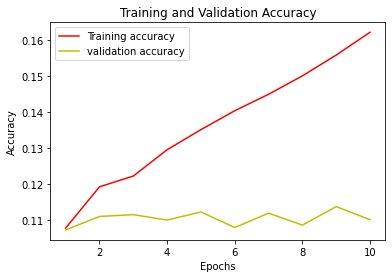

In [ ]:
epochs = range(1,11)
plt.plot(epochs, history_pretrain.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history_pretrain.history['val_accuracy'], 'y', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<li>Plot for loss function.</li>

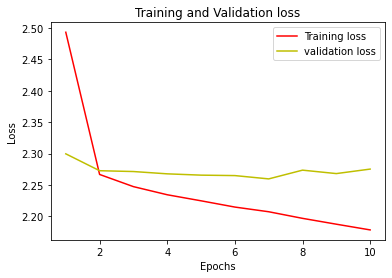

In [ ]:
epochs = range(1,11)
plt.plot(epochs, history_pretrain.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history_pretrain.history['val_loss'], 'y', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training the randomly intialised model

In [ ]:
untrained_model=Sequential()
untrained_model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
untrained_model.add(BatchNormalization())
untrained_model.add(MaxPooling2D(2,2))
untrained_model.add(Conv2D(32,(3,3),activation='relu'))
untrained_model.add(BatchNormalization())
untrained_model.add(MaxPooling2D(2,2))
untrained_model.add(Conv2D(64,(3,3),activation='relu'))
untrained_model.add(BatchNormalization())
untrained_model.add(MaxPooling2D(2,2))
untrained_model.add(Flatten())
untrained_model.add(Dense(128,activation='relu'))
untrained_model.add(Dense(64,activation='relu'))
untrained_model.add(Dense(10,activation='softmax'))

In [ ]:
untrained_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

<li>Setting path to save model checkpoints.</li>

In [ ]:
untrained_model_path='Untrained_Model.epoch{epoch:02d}.hdf5'
checkpoint_2= ModelCheckpoint(filepath='/content/drive/MyDrive/Saved_Material_task2_part 3/'+untrained_model_path,verbose=1)

<li>Training the model.</li>

In [ ]:
history_untrained=untrained_model.fit(X_train,y_train,batch_size=256,validation_data=(X_cv,y_cv),epochs=10,callbacks=checkpoint_2)

Epoch 1/10
188/188 [==============================] - 57s 298ms/step - loss: 2.3490 - accuracy: 0.1055 - val_loss: 2.6314 - val_accuracy: 0.1057

Epoch 00001: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Untrained_Model.epoch01.hdf5
Epoch 2/10
188/188 [==============================] - 56s 296ms/step - loss: 2.2668 - accuracy: 0.1164 - val_loss: 2.4515 - val_accuracy: 0.1073

Epoch 00002: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Untrained_Model.epoch02.hdf5
Epoch 3/10
188/188 [==============================] - 56s 296ms/step - loss: 2.2445 - accuracy: 0.1236 - val_loss: 2.2547 - val_accuracy: 0.1126

Epoch 00003: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Untrained_Model.epoch03.hdf5
Epoch 4/10
188/188 [==============================] - 56s 298ms/step - loss: 2.2277 - accuracy: 0.1285 - val_loss: 2.2463 - val_accuracy: 0.1107

Epoch 00004: saving model to /content/drive/MyDrive/Saved_Material_task2_part 3/Untrained

<li>Plot for accuracy.</li>

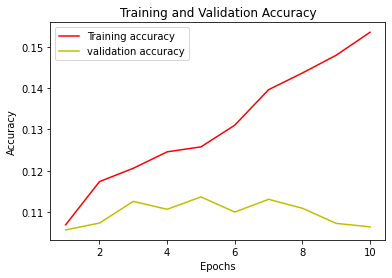

In [ ]:
epochs = range(1,11)
plt.plot(epochs, history_untrained.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history_untrained.history['val_accuracy'], 'y', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<li>Plot for loss function.</li>

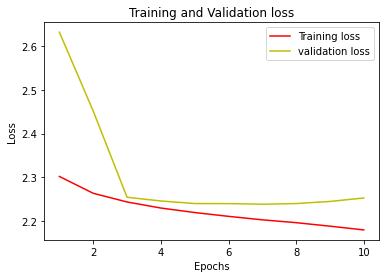

In [ ]:
epochs = range(1,11)
plt.plot(epochs, history_untrained.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history_untrained.history['val_loss'], 'y', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Loading the test data

<li>load_dataset function loads the test data.</li>

In [ ]:
def load_dataset(file_path_img,file_path_label):
  X=idx2numpy.convert_from_file(file_path_img)
  y=idx2numpy.convert_from_file(file_path_label)
  return X,y

<li>Storing the image vectors in X_test and corresponding labels in y_test</li>

In [ ]:
test_img_path='/content/drive/MyDrive/task2/t10k-images.idx3-ubyte'
test_label_path='/content/drive/MyDrive/task2/t10k-labels.idx1-ubyte'
X_test,y_test=load_dataset(test_img_path,test_label_path)

In [ ]:
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


### Preprocessing the images.
<ul>
<li>The function img_preprocess  preprocesses our image.</li>
<li>It converts the image into grayscale and resizes it to (32,32) and normalises the pixel values.</li>
</ul>

In [ ]:
def img_preprocess(img_vector):
  x_final=[]
  for i in range(0,len(img_vector)):
    img = img_vector[i]
    res = cv2.resize(img, dsize=(32, 32))
    data = image.img_to_array(res)
    x_final.append(data/255.0)
  return np.array(x_final)

<li>Calling the img_preprocess function.</li>

In [ ]:
X_final_test=img_preprocess(X_test)

In [ ]:
y_test = np.array(y_test)
y_test.shape

(10000,)

<li>Converting the labels into categorical array.</li>

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(y_test,num_classes=10, dtype = 'int')

### Testing the pretrained model.

In [ ]:
pretrain_model.evaluate(X_final_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 5.0602 - accuracy: 0.0012


[5.060174465179443, 0.0012000000569969416]

<li>Storing the predictions of the model </li>

In [ ]:
y_pred_label=pretrain_model.predict(X_final_test)

In [ ]:
y_pred_categorical=np.zeros((10000,10))

### Creating a cateogrical vector which contains 0's and it would contain 1 corresponding to the predicted class.

In [ ]:
for i in range(0,len(y_pred_label)):
  idx=np.argmax(y_pred_label[i])
  for j in range(0,len(y_pred_label[i])):
    if j==idx:
      y_pred_categorical[i][j]=1
    else:
       y_pred_categorical[i][j]=0

In [ ]:
y_pred_categorical=y_pred_categorical.astype(int)

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_pred_categorical,y_test,average='macro'))

0.0011851747955065953


<ul>
<li>Calculating the recall_score</li>
</ul>

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_pred_categorical,y_test,average='macro'))

0.0008480776359129034


### Testing the randomly intialised model.

In [ ]:
untrained_model.evaluate(X_final_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 5.7509 - accuracy: 0.0010


[5.750897407531738, 0.0010000000474974513]

<li>Storing the predictions of the model </li>

In [ ]:
y_pred_untrain=untrained_model.predict(X_final_test)

In [ ]:
y_categorical=np.zeros((10000,10))

### Creating a cateogrical vector which contains 0's and it would contain 1 corresponding to the predicted class.

In [ ]:
for i in range(0,len(y_pred_untrain)):
  idx=np.argmax(y_pred_untrain[i])
  for j in range(0,len(y_pred_untrain[i])):
    if j==idx:
      y_categorical[i][j]=1
    else:
       y_categorical[i][j]=0

In [ ]:
y_categorical=y_categorical.astype(int)

<ul>
<li>Calculating the precision_score</li>
</ul>

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_categorical,y_test,average='macro'))

0.0010056811877332827


<ul>
<li>Calculating the recall_score</li>
</ul>

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_categorical,y_test,average='macro'))

0.0011249146774445812


<ul>
I chose average ='macro' in the recall_score and precision_score because
<li>It calculates metrics for each label and finds their unweighted mean and it does not take class imbalance into account.</li>
</ul>

# Inference
<ul>
<li>The train data had 10 classes from 0 to 9 (both inclusive).</li>
<li>The given training dataset had alot of noise i.e there were many image with false labels present in each class i.e the folder labelled as 9 had very less number of 9 i.e true labels for class - 9 and contained more of other digits which were between 0 to 8, i.e false labels.</li>
<li>While training on this dataset, both the pre-trained and randomly intialised model where not doing well on cross validation set even though the loss of train was decreasing. This means that the model was not able to tune  it's weight for the different classes.</li>
<li>When tested on MNIST test data, which contained images with their true labels.</li>
<li>The accuracy for both the pretrained and randomly intialised model came out to be very less ~ (10^-3).</li>
<li>This happened because the model parameters were not able to tune  to recognize the actual class of a particular image because of the noise present in the training data.</li>
<li>The accuracy of pretrained model was very slighty higher as compared to randomly intialised model.</li>
<li>Precision score also came out to be almost similar for both the models and very less ~ (10^-3) but the pretrained model had slightly greater precision score which means that it could predict more number of positive identification which were actually correct as compared to the randomly intialised weigths.</li>
<li>Recall score also came out to be order of (10^-4) for the pretrained model and for randomly intialised weight it was of order (10^-3) but the randomly intialised model had  greater recall score which means that it identifies more number of actual positive could be identified correctly.</li>
</ul>